In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
df = pd.read_csv('nyc_crime.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460745 entries, 0 to 460744
Data columns (total 35 columns):
CMPLNT_NUM           460745 non-null int64
ADDR_PCT_CD          460745 non-null int64
BORO_NM              460430 non-null object
CMPLNT_FR_DT         460745 non-null object
CMPLNT_FR_TM         460745 non-null object
CMPLNT_TO_DT         402907 non-null object
CMPLNT_TO_TM         403146 non-null object
CRM_ATPT_CPTD_CD     460745 non-null object
HADEVELOPT           21541 non-null object
HOUSING_PSA          33053 non-null float64
JURISDICTION_CODE    460437 non-null float64
JURIS_DESC           460745 non-null object
KY_CD                460745 non-null int64
LAW_CAT_CD           460745 non-null object
LOC_OF_OCCUR_DESC    377888 non-null object
OFNS_DESC            460733 non-null object
PARKS_NM             4024 non-null object
PATROL_BORO          460437 non-null object
PD_CD                460437 non-null float64
PD_DESC              460437 non-null object
PREM_TYP_DESC

### Clean data

In [3]:
df

#delete unnecessary columns and fill NaN values before doing anything
#check for duplicates. check for columns .nunique() for columns for unique values

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/19,18:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,U,NaN,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/19,20:30:00,12/31/19,10:00:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/19,16:55:00,12/24/19,17:00:00,COMPLETED,NaN,NaN,...,M,NaN,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/19,19:32:00,NaN,NaN,COMPLETED,NaN,NaN,...,F,NaN,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/19,15:30:00,12/30/19,16:50:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460740,892593560,73,BROOKLYN,1/3/19,16:29:00,1/3/19,16:45:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,WHITE HISPANIC,M,1010408,183068,40.669126,-73.905707,"(40.66912567900005, -73.90570750399996)"
460741,249722424,105,QUEENS,1/2/19,22:40:00,1/2/19,22:45:00,COMPLETED,NaN,NaN,...,F,NaN,25-44,BLACK,M,1058138,191578,40.692214,-73.733559,"(40.692213915000025, -73.73355857399997)"
460742,214650701,63,BROOKLYN,1/5/19,20:30:00,1/5/19,20:45:00,COMPLETED,NaN,NaN,...,F,NaN,UNKNOWN,UNKNOWN,D,1005804,161486,40.609900,-73.922373,"(40.60990012500002, -73.92237286099999)"
460743,172836038,14,MANHATTAN,1/4/19,5:15:00,1/4/19,5:25:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,BLACK,M,987472,214939,40.756642,-73.988372,"(40.75664204200007, -73.98837157699995)"


#### Delete unnecessary columns. Columns that are not needed are: HADEVELOPT, HOUSING_PSA, JURISDICTION_CODE, JURIS_DESC, LOC_OF_OCCUR_DESC, PARKS_NM, STATION_NAME, TRANSIT_DISTRICT.

In [4]:
df.drop(['HADEVELOPT', 'HOUSING_PSA', 'PREM_TYP_DESC', 'JURISDICTION_CODE', 'JURIS_DESC', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'STATION_NAME', 'TRANSIT_DISTRICT'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460745 entries, 0 to 460744
Data columns (total 26 columns):
CMPLNT_NUM          460745 non-null int64
ADDR_PCT_CD         460745 non-null int64
BORO_NM             460430 non-null object
CMPLNT_FR_DT        460745 non-null object
CMPLNT_FR_TM        460745 non-null object
CMPLNT_TO_DT        402907 non-null object
CMPLNT_TO_TM        403146 non-null object
CRM_ATPT_CPTD_CD    460745 non-null object
KY_CD               460745 non-null int64
LAW_CAT_CD          460745 non-null object
OFNS_DESC           460733 non-null object
PATROL_BORO         460437 non-null object
PD_CD               460437 non-null float64
PD_DESC             460437 non-null object
RPT_DT              460745 non-null object
SUSP_AGE_GROUP      351550 non-null object
SUSP_RACE           351550 non-null object
SUSP_SEX            351550 non-null object
VIC_AGE_GROUP       460742 non-null object
VIC_RACE            460742 non-null object
VIC_SEX             460742 non-

In [5]:
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,...,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/19,18:00:00,NaN,NaN,COMPLETED,105,FELONY,...,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/19,20:30:00,12/31/19,10:00:00,COMPLETED,341,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/19,16:55:00,12/24/19,17:00:00,COMPLETED,106,FELONY,...,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/19,19:32:00,NaN,NaN,COMPLETED,341,MISDEMEANOR,...,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/19,15:30:00,12/30/19,16:50:00,COMPLETED,341,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460740,892593560,73,BROOKLYN,1/3/19,16:29:00,1/3/19,16:45:00,COMPLETED,348,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,M,1010408,183068,40.669126,-73.905707,"(40.66912567900005, -73.90570750399996)"
460741,249722424,105,QUEENS,1/2/19,22:40:00,1/2/19,22:45:00,COMPLETED,106,FELONY,...,BLACK,F,25-44,BLACK,M,1058138,191578,40.692214,-73.733559,"(40.692213915000025, -73.73355857399997)"
460742,214650701,63,BROOKLYN,1/5/19,20:30:00,1/5/19,20:45:00,COMPLETED,341,MISDEMEANOR,...,BLACK,F,UNKNOWN,UNKNOWN,D,1005804,161486,40.609900,-73.922373,"(40.60990012500002, -73.92237286099999)"
460743,172836038,14,MANHATTAN,1/4/19,5:15:00,1/4/19,5:25:00,COMPLETED,344,MISDEMEANOR,...,NaN,NaN,25-44,BLACK,M,987472,214939,40.756642,-73.988372,"(40.75664204200007, -73.98837157699995)"


In [6]:
# Fill in NaN values on BORO_NM
df["BORO_NM"].fillna("UNKNOWN", inplace = True) 

# Change the dates to datetime format
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], errors='coerce')
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], errors='coerce')
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,...,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,2019-12-31,18:00:00,NaT,NaN,COMPLETED,105,FELONY,...,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,2019-12-30,20:30:00,2019-12-31,10:00:00,COMPLETED,341,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,2019-12-24,16:55:00,2019-12-24,17:00:00,COMPLETED,106,FELONY,...,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,2019-12-30,19:32:00,NaT,NaN,COMPLETED,341,MISDEMEANOR,...,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,2019-12-30,15:30:00,2019-12-30,16:50:00,COMPLETED,341,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460740,892593560,73,BROOKLYN,2019-01-03,16:29:00,2019-01-03,16:45:00,COMPLETED,348,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,M,1010408,183068,40.669126,-73.905707,"(40.66912567900005, -73.90570750399996)"
460741,249722424,105,QUEENS,2019-01-02,22:40:00,2019-01-02,22:45:00,COMPLETED,106,FELONY,...,BLACK,F,25-44,BLACK,M,1058138,191578,40.692214,-73.733559,"(40.692213915000025, -73.73355857399997)"
460742,214650701,63,BROOKLYN,2019-01-05,20:30:00,2019-01-05,20:45:00,COMPLETED,341,MISDEMEANOR,...,BLACK,F,UNKNOWN,UNKNOWN,D,1005804,161486,40.609900,-73.922373,"(40.60990012500002, -73.92237286099999)"
460743,172836038,14,MANHATTAN,2019-01-04,5:15:00,2019-01-04,5:25:00,COMPLETED,344,MISDEMEANOR,...,NaN,NaN,25-44,BLACK,M,987472,214939,40.756642,-73.988372,"(40.75664204200007, -73.98837157699995)"


In [7]:
CN_unique = df['CMPLNT_NUM'].nunique()
CN_unique

460745

### Display amount of Crimes per borough in the data set

BROOKLYN         132152
MANHATTAN        116147
BRONX            100793
QUEENS            92363
STATEN ISLAND     18975
UNKNOWN             315
Name: BORO_NM, dtype: int64

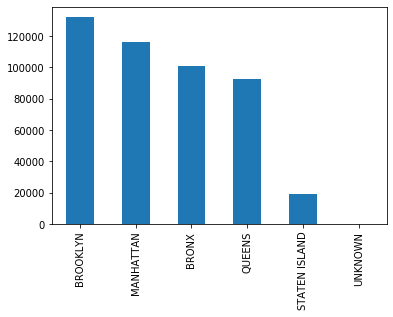

In [8]:
borough_count = df.BORO_NM.value_counts()
borough_count.plot(kind='bar')
borough_count

### Plot frequency of crimes by date for each borough

In [9]:
# Create a subset dataframe by combining columns

# set index to the date
# date_and_borough_df = df[['CMPLNT_FR_DT', 'BORO_NM']].set_index('CMPLNT_FR_DT')

# ignoring setting index as date
date_and_borough_df = df[['CMPLNT_FR_DT', 'BORO_NM']]
date_and_borough_df


,CMPLNT_FR_DT,BORO_NM
0,2019-12-31,BRONX
1,2019-12-30,MANHATTAN
2,2019-12-24,BROOKLYN
3,2019-12-30,BRONX
4,2019-12-30,MANHATTAN
...,...,...
460740,2019-01-03,BROOKLYN
460741,2019-01-02,QUEENS
460742,2019-01-05,BROOKLYN
460743,2019-01-04,MANHATTAN


In [10]:
#use groupbydate and do the .count (this is when the index is date is already)
#then, df.plot

# date_and_borough_df.set_index('CMPLNT_FR_DT')
# date_and_borough_df.info()
# monthly = opsd_daily[data_columns].resample('W').mean()

In [11]:
# Function to get a filter from the Dataframe by passing in the BORO_NM value
def getFilter(search_term):
    ret = []
    for result in date_and_borough_df.BORO_NM:
        if re.search(search_term, result):
            ret.append(True)
        else:
            ret.append(False)
    return ret

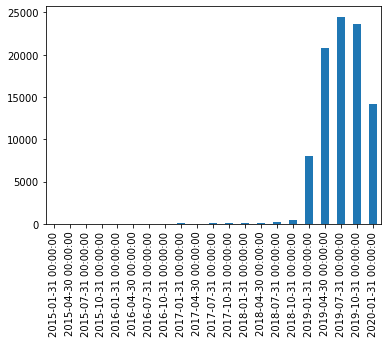

In [12]:
# Plot Queens Crime Frequency by Date 

#Create the filter
queens_filter = getFilter("QUEENS")

#Use the filter to filter only QUEENS entries
queens = date_and_borough_df[queens_filter]

# Count the sum of occurences for each date
queens_date_count = queens.CMPLNT_FR_DT.value_counts()

# Use resample to organize it into Yearly sums
queens_date_count = queens_date_count.resample(rule='3M').apply('sum')
queens_date_count

#Plot 
queens_date_count.plot(kind='bar')



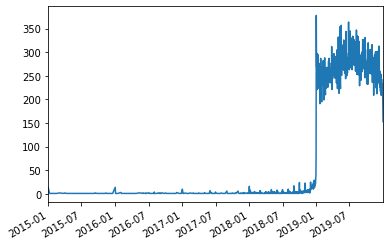

In [13]:
# Plot Bronx Crime Frequency by Date 
bronx_filter = getFilter("BRONX")
bronx = date_and_borough_df[bronx_filter]
bronx.CMPLNT_FR_DT.value_counts().plot(kind="line")


In [14]:
# Count the frequency of crimes in each borough for each day
date_boro = df.groupby(['CMPLNT_FR_DT', 'BORO_NM']).size()
date_boro

CMPLNT_FR_DT  BORO_NM      
2015-01-01    BRONX             13
              BROOKLYN           8
              MANHATTAN          7
              QUEENS             6
              STATEN ISLAND      1
                              ... 
2019-12-31    BROOKLYN         198
              MANHATTAN        180
              QUEENS           119
              STATEN ISLAND     21
              UNKNOWN            1
Length: 4433, dtype: int64

In [15]:
#Old way of getting the filter
# manhattan_ = []
# for result in date_and_borough_df.BORO_NM:
#     if re.search('MANHATTAN', result):
#         manhattan_.append(True)
#     else:
#         manhattan_.append(False)

#Use new function to get the Manhattan filter
manhattan_ = getFilter("MANHATTAN")
manhattan_
len(manhattan_)

460745

In [16]:
#Use the manhattan filter to create a filtered Manhattan dataframe
manhattan_df = date_and_borough_df[manhattan_]
manhattan_df.shape
manhattan_df

,CMPLNT_FR_DT,BORO_NM
1,2019-12-30,MANHATTAN
4,2019-12-30,MANHATTAN
8,2019-12-29,MANHATTAN
9,2019-12-28,MANHATTAN
11,2019-12-28,MANHATTAN
...,...,...
460735,2019-01-04,MANHATTAN
460736,2019-01-03,MANHATTAN
460737,2019-01-05,MANHATTAN
460739,2019-01-04,MANHATTAN


In [17]:
#Get the frequency of crimes in Manhattan for each day
manhattan_dates = manhattan_df.CMPLNT_FR_DT.value_counts()
manhattan_dates
#convert manhattan_dates to datadrame

2019-01-01    505
2019-06-21    407
2019-08-20    404
2019-06-12    399
2019-09-27    399
             ... 
2017-11-26      1
2017-06-24      1
2016-02-20      1
2017-10-31      1
2017-12-14      1
Name: CMPLNT_FR_DT, Length: 933, dtype: int64

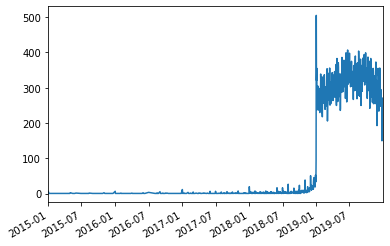

In [18]:
#Plot manhattan
manhattan_dates.plot()

In [19]:
# plt.plot( 'CMPLNT_FR_DT', 'CRIMES', data=manhattan_dates, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'CMPLNT_FR_DT', 'CRIMES', data=manhattan, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
# plt.legend()

In [20]:
#create a dataframe with dates and the frequency of boroughs for each date